# pyPanair Tutorial#3 Wing/body model
In this tutorial we will perform an analysis of a wing/body configuration.  

The model is based on the [AGARD-B model<sup>1</sup>](http://www.uwal.org/download/documents/agardcalmodelspecs.pdf)  
(The sting is not included, and the aft-body is slightly modified for this tutorial.)
![uppersurface]()

## 1.Defining the geometry

The model will be composed from eight networks:    

1. Wing  
2. Nose  
3. Mid-body
4. Aft-body
5. Body base
6. Wing wake
7. Body base wake
8. Body wake

The geometry of the model is defined in terms of the body diameter `D`.  
For simplicity, it will be set at `D=1`.

### 1.1 Wing

First, initialize a `LaWGS` object.

In [1]:
from pyPanair.preprocess import wgs_creator
wgs = wgs_creator.LaWGS("agardb_mod")

Next, we will create a `Line` object that defines the airfoil at the wing root.  
The airfoil of the AGARD-B model is a circular-arc airfoil of 4% thickness.  
A csv file has been prepared in advance. 
The coordinates in `circular_arc.csv` are normalized, so when using the `read_airfoil` function, we shall set the `expantion_ratio` at `2.598`.
By doing so, the x & z-axis coordinates of the resulting airfoil will be multiplied by `2.598`.

In [7]:
root_airfoil = wgs_creator.read_airfoil("circular_arc.csv", span_pos=0.5, expansion_ratio=2.598)

<IPython.core.display.Javascript object>


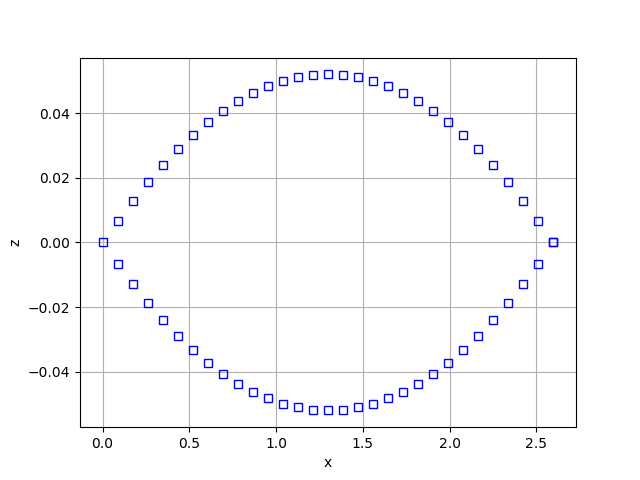

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(root_airfoil[:,0], root_airfoil[:,2], "s", mfc="None", mec="b")
plt.xlabel("x")
plt.ylabel("z")
plt.grid()

Next, we define the tip chord. 
The tip of the wing is a point, but when defining it, we need to use the same number of points we used to define the wing root.
This means that we need to define a `Line` with `61` identical points.  

This can be easily done by using the `replace` method. By typing

In [21]:
tip_airfoil = root_airfoil.replace(x=2.598, y=2., z=0.)

a copy of `root_airfoil` will be created. 
The xyz coordinates of each point in the copy will be replaced by `2.598`, `2.`, and `0.`, respectively.

The wing `Network` will be created and registered to `wgs` in the same way as tutorials 1 and 2.  

In [19]:
wing = root_airfoil.linspace(tip_airfoil, num=30)
wgs.append_network("wing", wing, 1)

<IPython.core.display.Javascript object>


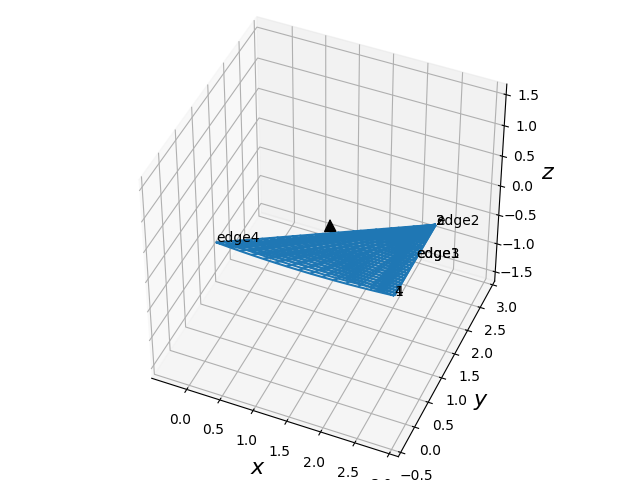

In [20]:
wing.plot_wireframe()